In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_rows',None)
train_df=pd.read_csv('../input/mobile-price-classification/train.csv')
test_df=pd.read_csv('../input/mobile-price-classification/test.csv')

In [2]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
train_df.shape

(2000, 21)

In [4]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [5]:
test_df.shape

(1000, 21)

In [6]:
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

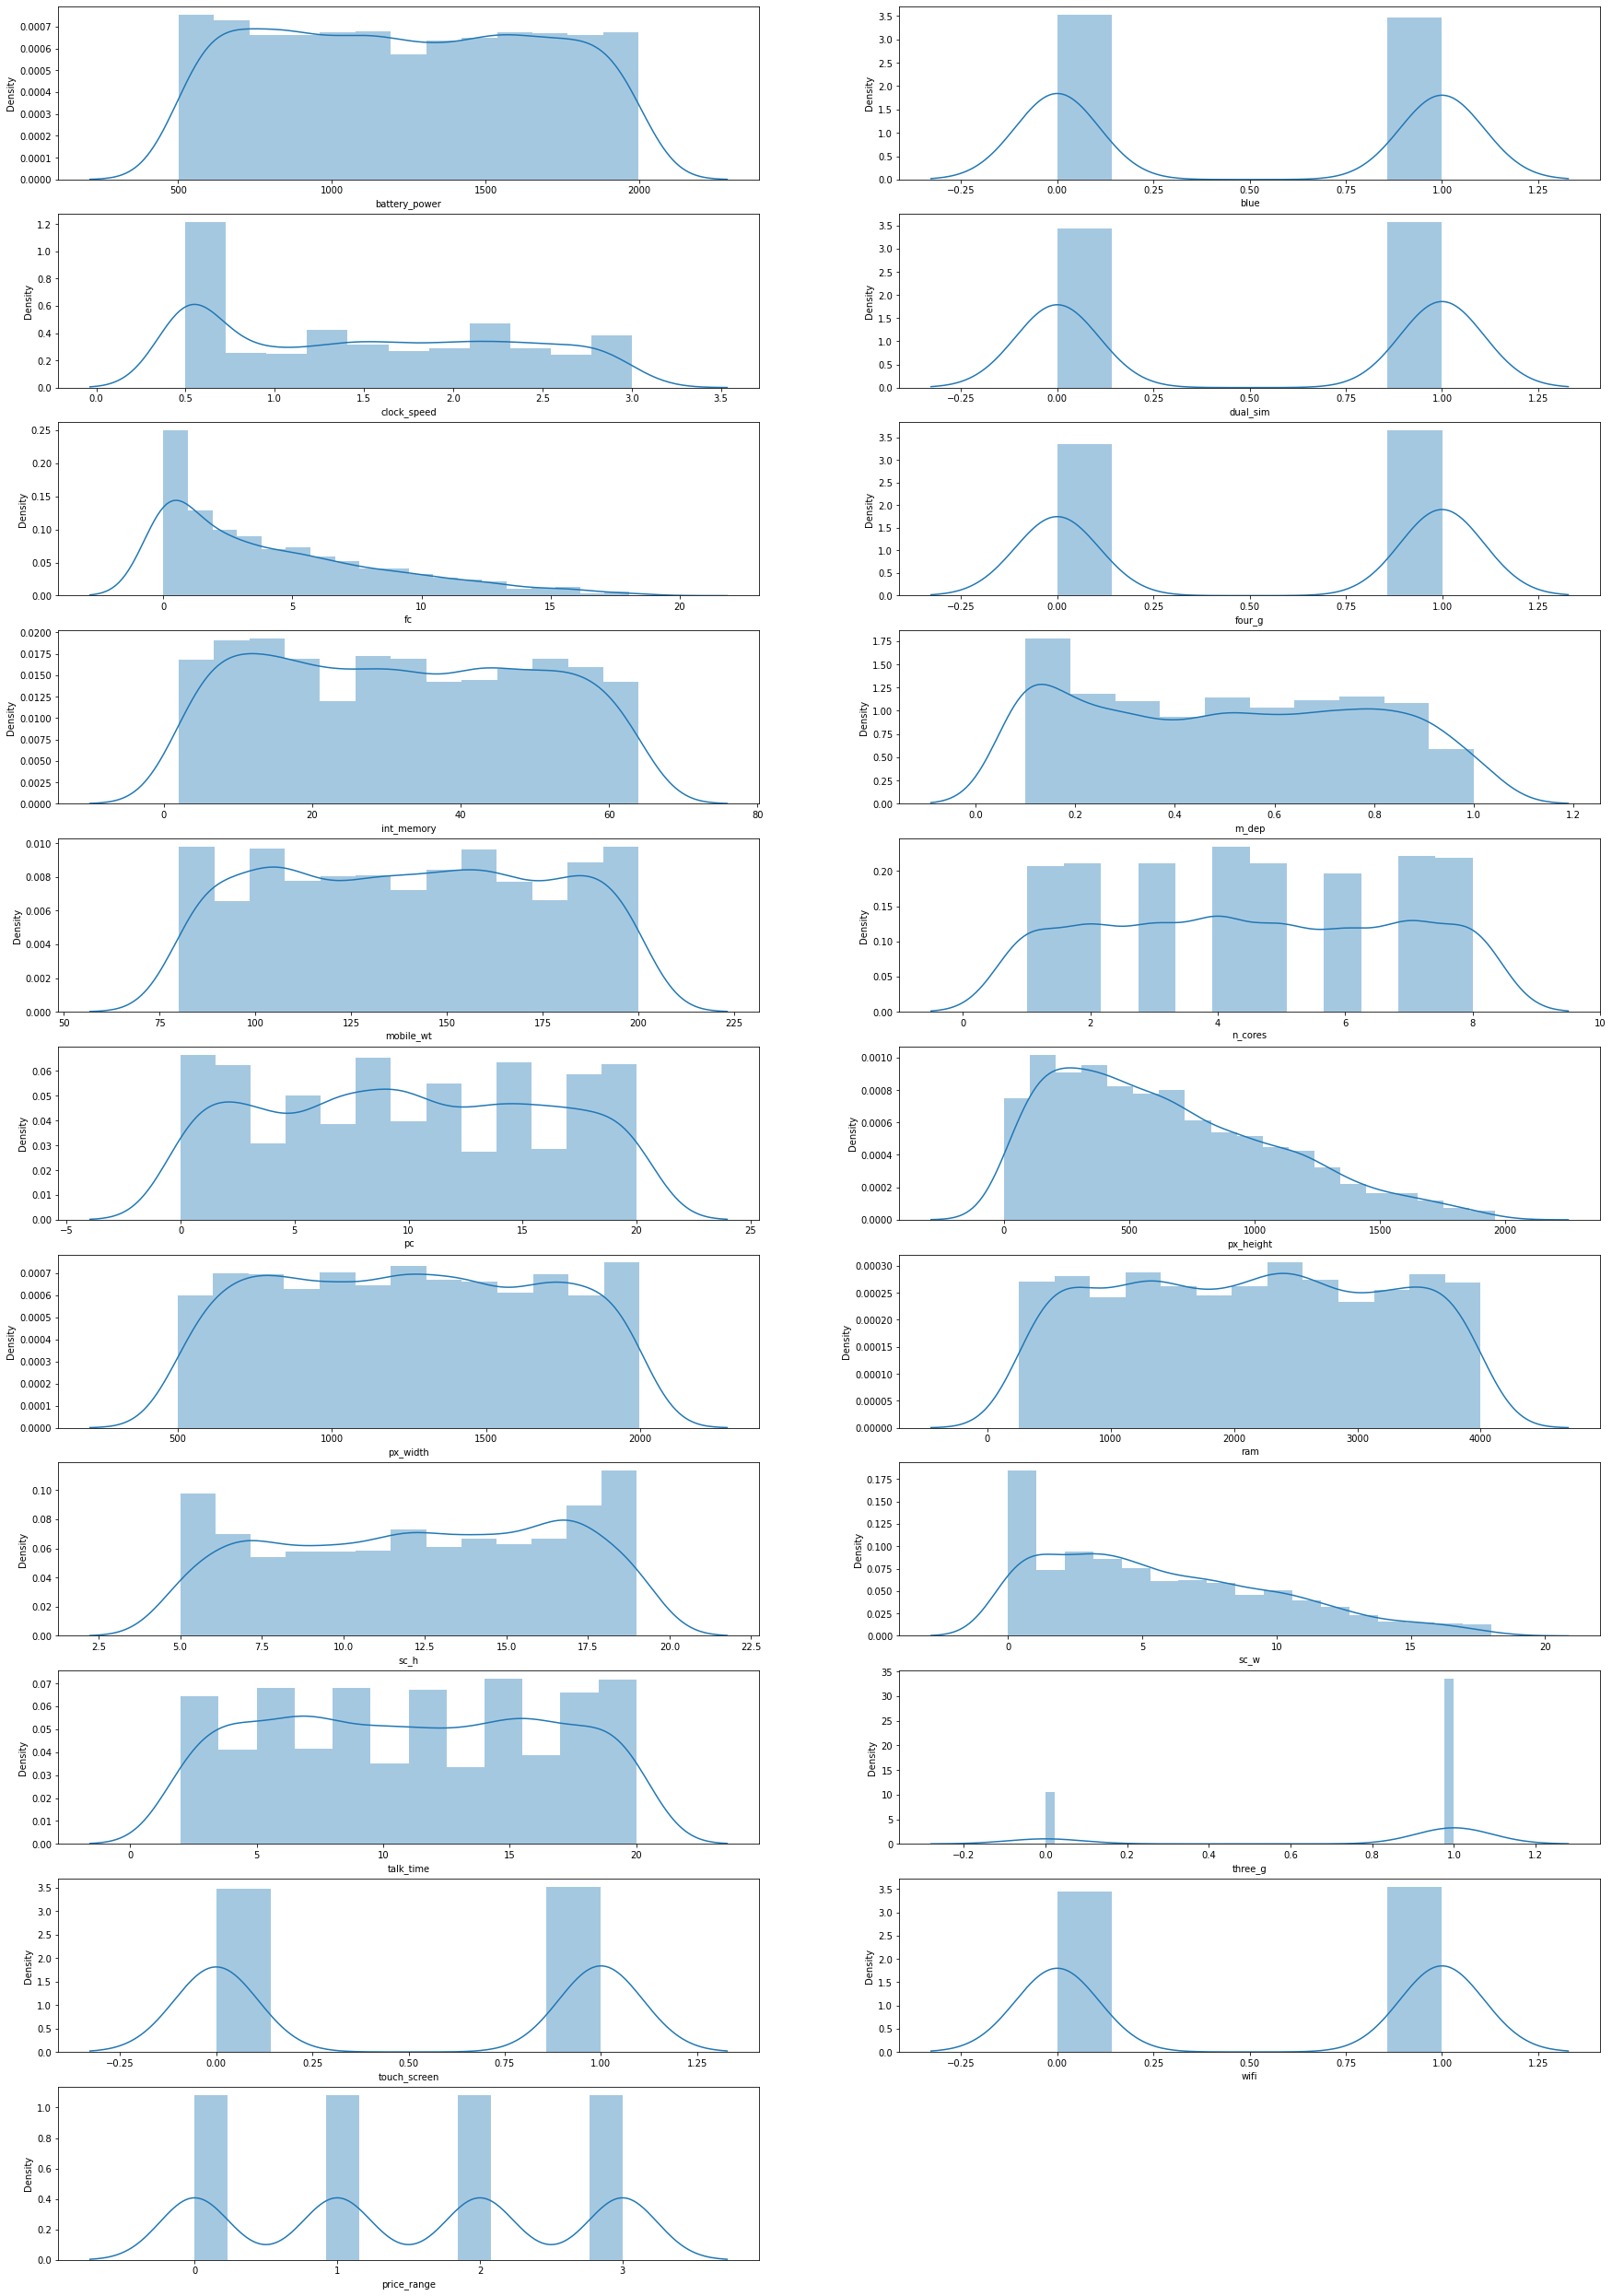

In [8]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(30,45))

for i, var in enumerate(train_df.columns):
    plt.subplot(11,2,i+1)
    sns.distplot(train_df[var])


In [9]:
train_df.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1


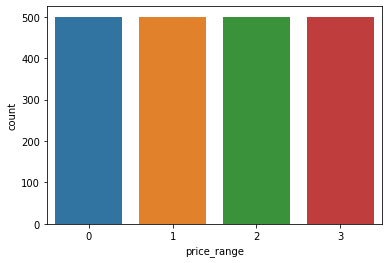

In [10]:
sns.countplot(train_df['price_range'])
plt.show()

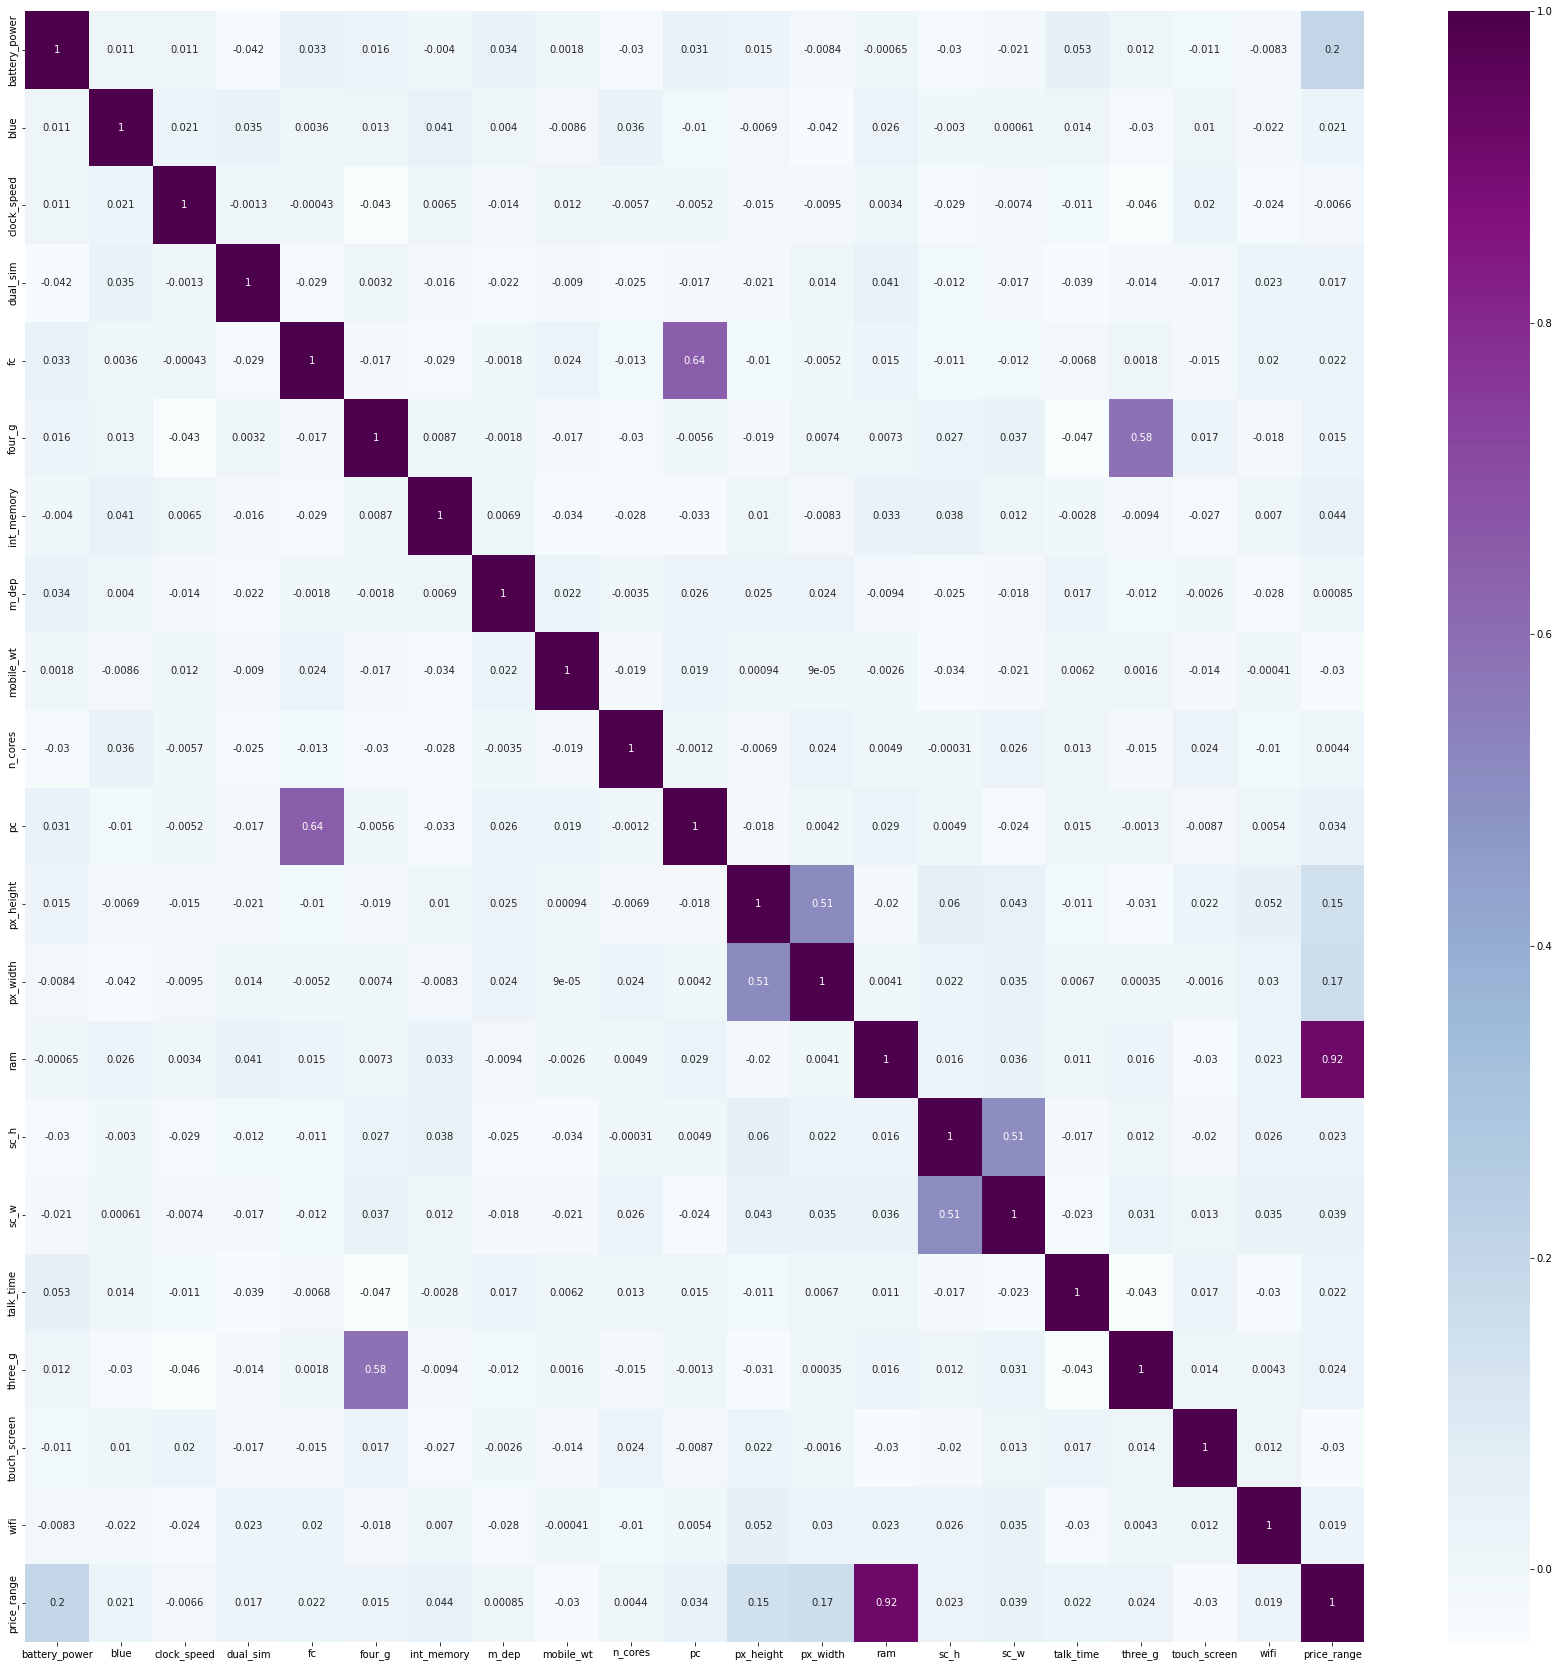

In [11]:
plt.figure(figsize=(30,30))
sns.heatmap(train_df.corr(),annot=True,cmap='BuPu')
plt.show()

In [12]:
x=train_df.drop(columns='price_range',axis=1)
y=train_df['price_range']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [14]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1400, 20) (600, 20) (1400,) (600,)


In [15]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()

In [16]:
lgbm.fit(x_train,y_train)

LGBMClassifier()

In [17]:
y_pred1=lgbm.predict(x_test)
y_pred1

array([2, 3, 0, 0, 3, 0, 3, 0, 2, 1, 2, 0, 2, 0, 3, 3, 0, 1, 2, 0, 2, 2,
       3, 1, 2, 2, 3, 2, 1, 3, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 3, 1,
       3, 1, 0, 2, 0, 0, 0, 3, 3, 3, 0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 1,
       2, 3, 1, 1, 2, 0, 0, 0, 3, 3, 0, 1, 1, 1, 1, 0, 2, 2, 0, 3, 1, 2,
       1, 2, 2, 0, 2, 2, 3, 2, 3, 0, 1, 1, 0, 3, 1, 0, 2, 3, 2, 2, 1, 3,
       2, 2, 1, 3, 0, 3, 3, 1, 3, 1, 1, 0, 3, 1, 0, 3, 2, 2, 1, 1, 2, 2,
       3, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 3, 2, 0, 0, 0, 3, 0, 1, 3,
       1, 3, 1, 2, 3, 3, 1, 2, 1, 1, 0, 0, 3, 0, 3, 0, 1, 0, 3, 2, 2, 0,
       3, 0, 3, 3, 0, 3, 2, 2, 0, 0, 0, 1, 3, 2, 1, 1, 0, 1, 0, 2, 2, 1,
       3, 1, 1, 3, 2, 3, 3, 3, 1, 0, 2, 2, 2, 1, 2, 0, 1, 2, 0, 0, 1, 3,
       3, 2, 3, 1, 2, 1, 2, 2, 3, 0, 0, 0, 0, 3, 2, 3, 1, 2, 3, 1, 1, 0,
       2, 2, 3, 0, 0, 1, 3, 2, 2, 2, 3, 0, 3, 3, 3, 0, 2, 1, 3, 0, 3, 0,
       0, 2, 0, 0, 0, 0, 3, 1, 1, 3, 3, 1, 3, 1, 0, 1, 0, 3, 2, 3, 2, 2,
       0, 3, 2, 0, 2, 3, 2, 2, 1, 1, 0, 1, 2, 1, 2,

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.9366666666666666

In [19]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier()
cat.fit(x_train,y_train)
y_pred2=cat.predict(x_test)
accuracy_score(y_test,y_pred2)

Learning rate set to 0.080496
0:	learn: 1.2898484	total: 63.4ms	remaining: 1m 3s
1:	learn: 1.1901378	total: 67.8ms	remaining: 33.8s
2:	learn: 1.1196021	total: 71.9ms	remaining: 23.9s
3:	learn: 1.0456429	total: 76ms	remaining: 18.9s
4:	learn: 0.9880996	total: 79.8ms	remaining: 15.9s
5:	learn: 0.9285861	total: 84.3ms	remaining: 14s
6:	learn: 0.8795506	total: 88.8ms	remaining: 12.6s
7:	learn: 0.8384311	total: 93.1ms	remaining: 11.5s
8:	learn: 0.7969713	total: 97.4ms	remaining: 10.7s
9:	learn: 0.7682977	total: 102ms	remaining: 10.1s
10:	learn: 0.7342161	total: 107ms	remaining: 9.58s
11:	learn: 0.7007999	total: 111ms	remaining: 9.14s
12:	learn: 0.6765958	total: 115ms	remaining: 8.77s
13:	learn: 0.6501534	total: 120ms	remaining: 8.42s
14:	learn: 0.6274545	total: 123ms	remaining: 8.1s
15:	learn: 0.6050135	total: 128ms	remaining: 7.85s
16:	learn: 0.5881960	total: 132ms	remaining: 7.62s
17:	learn: 0.5698155	total: 136ms	remaining: 7.41s
18:	learn: 0.5548686	total: 141ms	remaining: 7.26s
19:	lea

0.9533333333333334

In [20]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [21]:
test=test_df.copy()
test.head(1)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0


In [22]:
test_df=test_df.drop(columns='id',axis=1)
test_df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1


In [23]:
cat.fit(x,y)

Learning rate set to 0.081974
0:	learn: 1.2510825	total: 5.77ms	remaining: 5.77s
1:	learn: 1.1571912	total: 11.2ms	remaining: 5.59s
2:	learn: 1.0849690	total: 15.6ms	remaining: 5.19s
3:	learn: 1.0059667	total: 20.2ms	remaining: 5.04s
4:	learn: 0.9461395	total: 24.6ms	remaining: 4.9s
5:	learn: 0.8859977	total: 29.4ms	remaining: 4.88s
6:	learn: 0.8440766	total: 33.7ms	remaining: 4.79s
7:	learn: 0.7980407	total: 38.3ms	remaining: 4.75s
8:	learn: 0.7558771	total: 42.8ms	remaining: 4.71s
9:	learn: 0.7241781	total: 47ms	remaining: 4.65s
10:	learn: 0.6860449	total: 50.8ms	remaining: 4.57s
11:	learn: 0.6550398	total: 54.7ms	remaining: 4.5s
12:	learn: 0.6271439	total: 58.7ms	remaining: 4.46s
13:	learn: 0.6023937	total: 63.1ms	remaining: 4.44s
14:	learn: 0.5807490	total: 68.2ms	remaining: 4.47s
15:	learn: 0.5586682	total: 72.8ms	remaining: 4.47s
16:	learn: 0.5423498	total: 77ms	remaining: 4.45s
17:	learn: 0.5243200	total: 81.4ms	remaining: 4.44s
18:	learn: 0.5058890	total: 86.4ms	remaining: 4.46

In [24]:
y_pred3=cat.predict(test_df)

In [25]:
y_pred3[:5]

array([[3],
       [3],
       [2],
       [3],
       [1]])

In [26]:
y_pred3=y_pred3.reshape(-1,)
y_pred3[:5]

array([3, 3, 2, 3, 1])

In [27]:
submission=pd.DataFrame({'id':test['id'],'price_range':y_pred3})

In [28]:
submission.head()

,id,price_range
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1


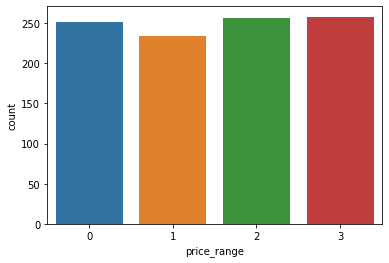

In [29]:
sns.countplot(submission['price_range'])
plt.show()

In [30]:
submission.to_csv('sub.csv',index=None)